![image](https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/notebooks/headers/watsonx-Prompt_Lab-Notebook.png)
# Prompt Lab on Notebook v1.0

이 노트북에는 프롬프트 추론을 시연하는 단계와 코드가 포함되어 있습니다.  
프롬프트 추론을 시연하는 단계와 코드가 포함되어 있습니다. 여기에는 API 키를 사용하여 인증하는 Python API 명령  
을 사용한 인증과 WML API를 사용한 프롬프트 추론에 대해 소개합니다.  
**Note:** 프롬프트 랩을 사용하여 생성된 노트북 코드는 성공적으로 실행됩니다.
코드가 수정되거나 순서가 바뀌면 성공적으로 실행된다는 보장은 없습니다.  
자세한 내용은 다음을 참조하세요: <a href="/docs/content/wsj/analyze-data/fm-prompt-save.html?context=wx" target="_blank">프롬프트 랩에서 작업을 노트북으로 저장하기.</a>

Python에 어느 정도 익숙하면 도움이 됩니다. 이 노트북은 Python 3.10을 사용합니다.

## Notebook goals
이 노트북의 학습 목표는 다음과 같습니다:

* IBM Cloud 개인 API 키에서 자격 증명을 얻기 위한 Python 함수 정의하기
* 모델 객체의 매개변수 정의하기
* 모델 개체를 사용하여 정의된 모델 ID, 매개변수 및 프롬프트 입력을 사용하여 응답 생성하기

## 소개
프롬프트 엔지니어링은 LLM 모델엥 명시적인 지시를 전달하는 수단이며, 생성형 AI 모델이 질문에 답하거나 요약을 생성하는 등 원하는 결과를 생성하도록 하는 대화의 수단입니다.

이 실습 랩은 생성형 AI 모델에 원하는 결과를 생성하도록 안내하는 AI의 중요한 측면인 프롬프트 엔지니어링의 개념을 탐구합니다.  
이는 챗봇, 텍스트 요약기, 콘텐츠 생성기와 같은 AI 도구에서 중요한 역할을 하여 정확하고 적절하며 창의적으로 의사소통을 보장합니다.  
이 랩에서는 챗봇 성능 향상부터 개인화 시스템 안내, 정확한 감정 분석 지원, 생산성 최적화에 이르기까지 비즈니스에서 신속한 엔지니어링의 이점을 강조합니다.  
ChatGPT와 같은 대규모 언어 모델(LLM)로 작업할 때 명확한 지침, 예제, 키워드 및 피드백의 중요성을 강조합니다.  
또한 명확한 지침 작성, 모델에게 "생각"할 시간 제공, CoT(사고 사슬) 프롬프트 및 생성된 지식 프롬프트와 같은 전략을 포함한 다양한 기술의 개요를 소개합니다.



## Prompting on  IBM Watsonx
ibm watsonx platform에서 prompting을 하기위해 사전에 설치해야하는 파이썬 패키지를 다음과 같이 설치합니다. 

In [ ]:
!pip install ibm-watson-machine-learning python-dotenv

In [ ]:
from dotenv import load_dotenv
import os  

load_dotenv()

credentials = {
		"url" : "https://us-south.ml.cloud.ibm.com",
		"apikey" : os.getenv("API_KEY", None)
	}


print(credentials)

#### project_id를 복사합니다.
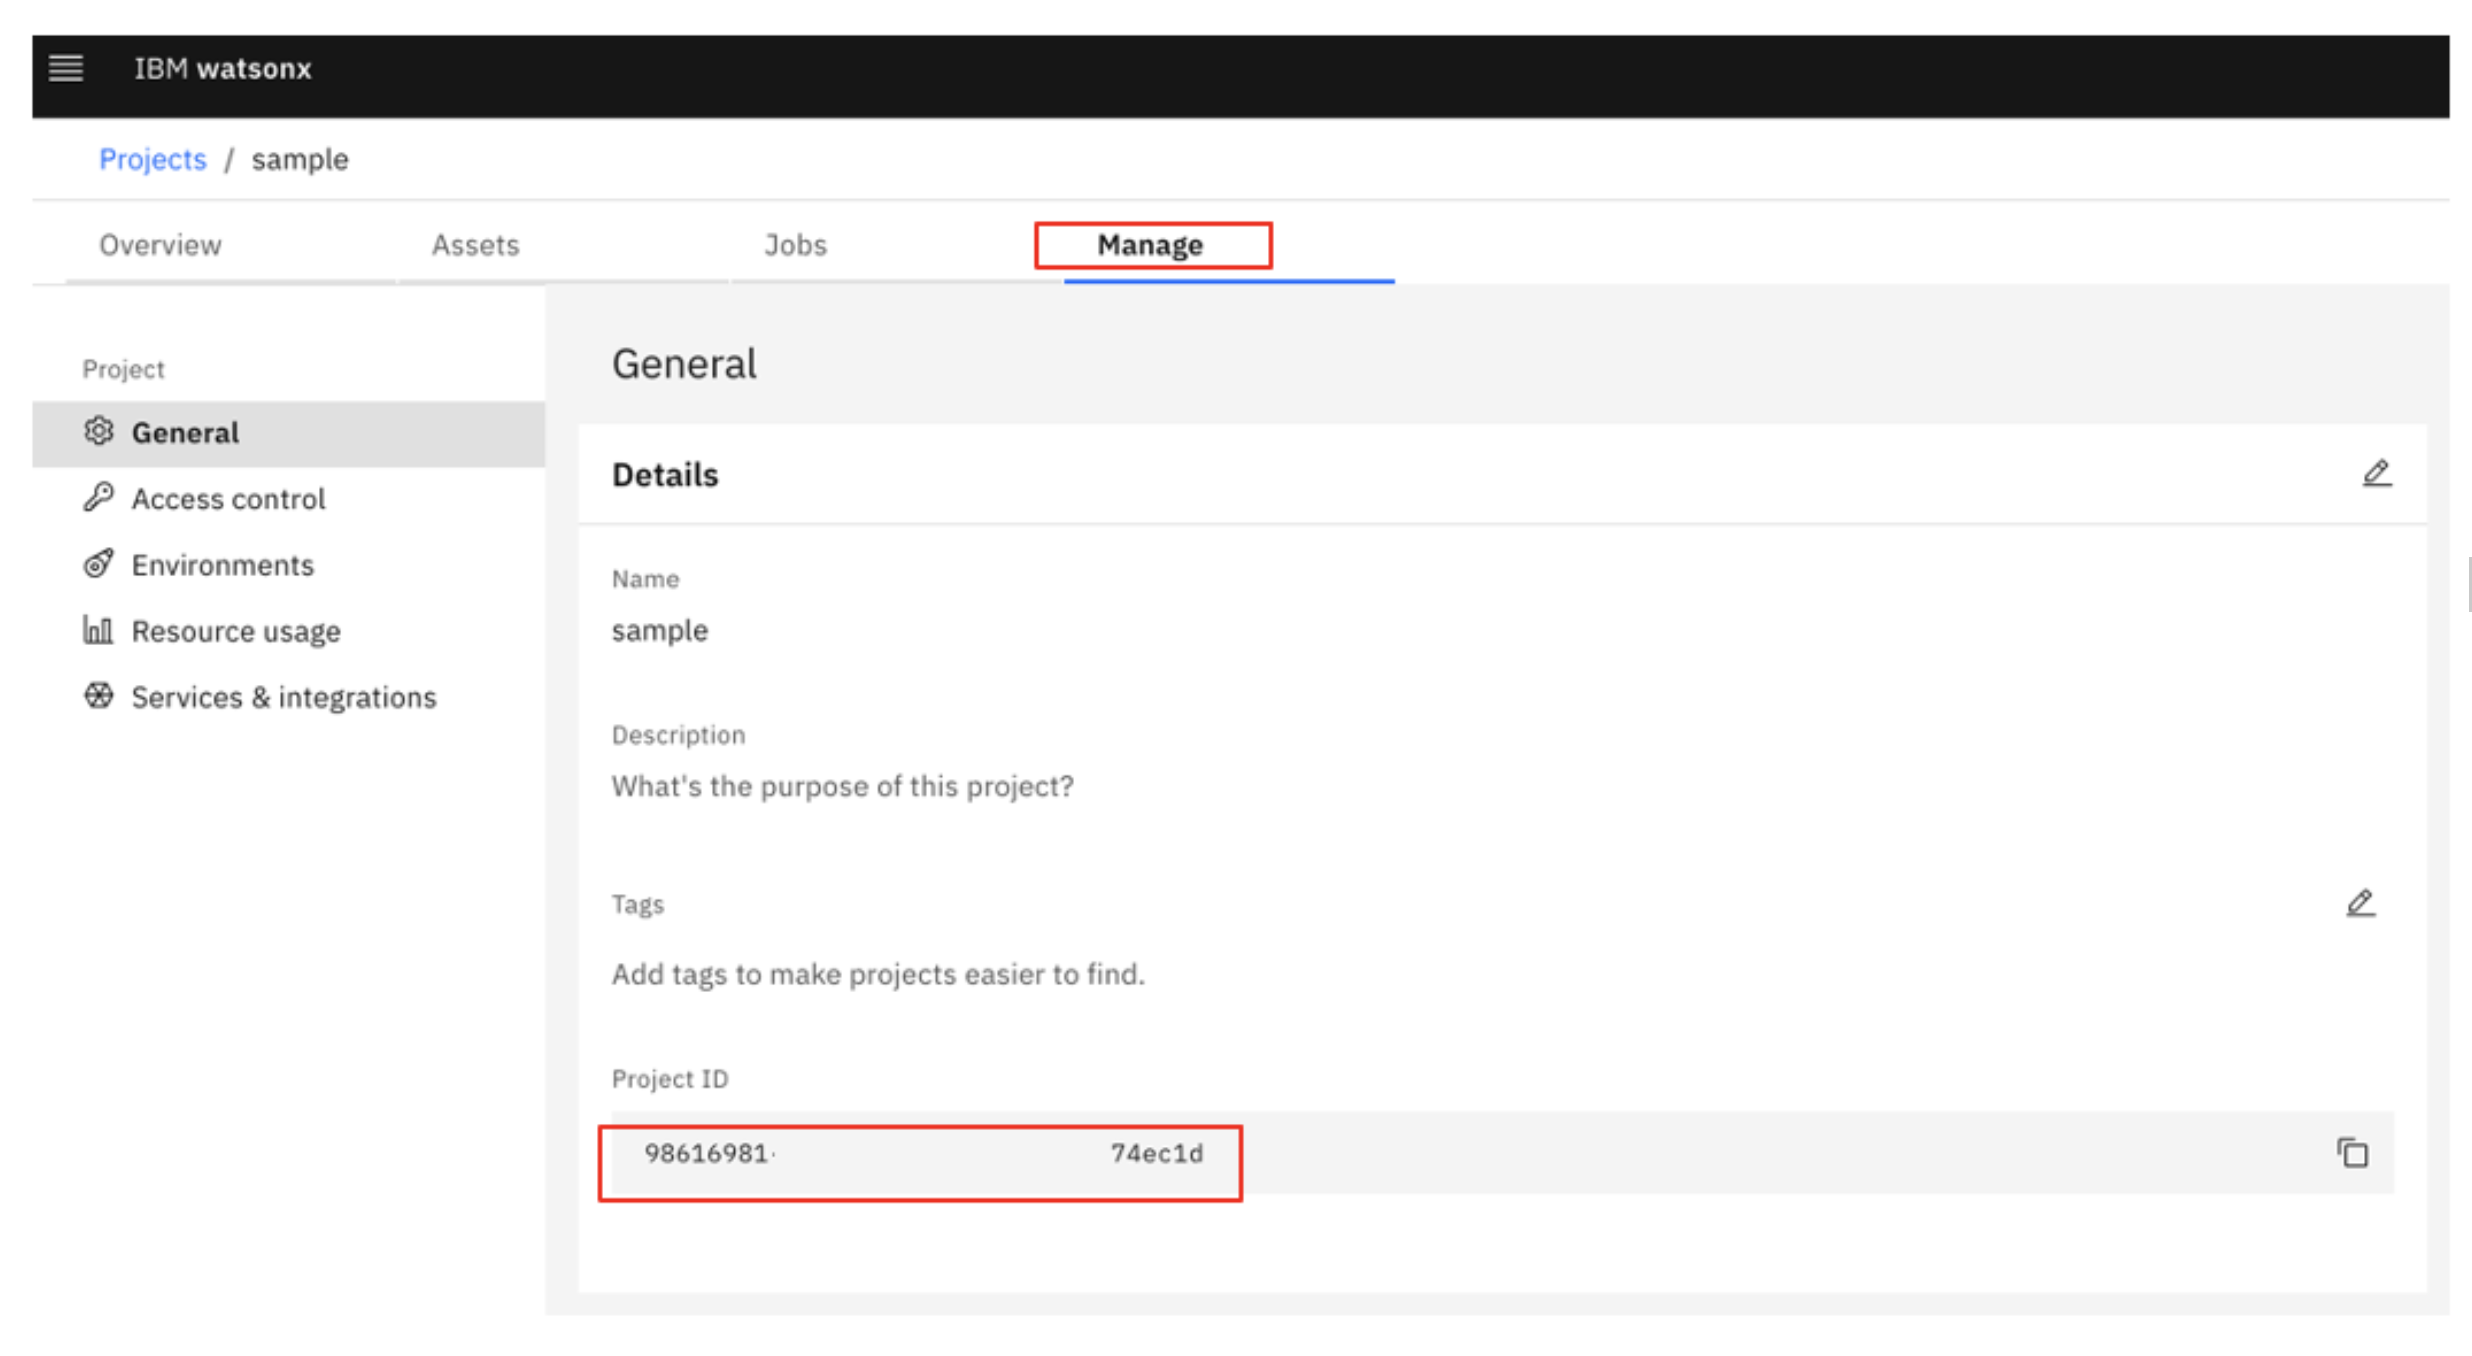

In [ ]:
project_id = os.getenv("PROJECT_ID", None)

In [ ]:
from ibm_watson_machine_learning.foundation_models import Model
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams

def send_to_watsonxai(prompts,
                    model_name="meta-llama/llama-2-70b-chat",
                    decoding_method="greedy",
                    max_new_tokens=100,
                    min_new_tokens=30,
                    temperature=1.0,
                    repetition_penalty=1.0,
                    stop_sequence=['\n\n']
                    ):
    '''
   프롬프트 및 매개 변수를 watsonx.ai로 보내기 위한 function
    
    Args:  
        prompts: 텍스트 프롬프트
        decoding_method: "sample" or "greedy"
        max_new_token:int watsonx.ai parameter for max new tokens/response returned
        temperature:float watsonx.ai parameter for temperature (range 0>2)
        repetition_penalty:float watsonx.ai parameter for repetition penalty (range 1.0 to 2.0)

    Returns: None
        prints response
    '''

    assert not any(map(lambda prompt: len(prompt) < 1, prompts)), "make sure none of the prompts in the inputs prompts are empty"

    # Instantiate parameters for text generation
    model_params = {
        GenParams.DECODING_METHOD: decoding_method,
        GenParams.MIN_NEW_TOKENS: min_new_tokens,
        GenParams.MAX_NEW_TOKENS: max_new_tokens,
        GenParams.RANDOM_SEED: 42,
        GenParams.TEMPERATURE: temperature,
        GenParams.REPETITION_PENALTY: repetition_penalty,
    }
    
    # Instantiate a model proxy object to send your requests
    model = Model(
        model_id=model_name,
        params=model_params,
        credentials=credentials,
        project_id=project_id)

    response = model.generate_text(prompt = prompt)

    return response   

In [4]:
FLAN_T5_XXL = 'google/flan-t5-xxl'
FLAN_UL2 = 'google/flan-ul2'
GPT_NEOX = 'eleutherai/gpt-neox-20b'
GRANITE_13B_CHAT = 'ibm/granite-13b-chat-v1'
GRANITE_13B_INSTRUCT = 'ibm/granite-13b-instruct-v1'
LLAMA_2_70B_CHAT = 'meta-llama/llama-2-70b-chat'
LLAMA_3_70B_INSTRUCT="meta-llama/llama-3-70b-instruct"
MPT_7B_INSTRUCT2 = 'ibm/mpt-7b-instruct2'
MT0_XXL = 'bigscience/mt0-xxl'
STARCODER = 'bigcode/starcoder'
MISTRAL_LARGE = "mistralai/mistral-large"

#### 실습1 - 프롬프트로 시를 작성해 보세요.

In [ ]:
input = """
context : 질문에 대한 답을 한국어로 답해주세요.
input : 인공지능에 대한 시를 김소월 방식으로 생성해줘.
result : 
"""

prompt = f"""

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_3_70B_INSTRUCT, decoding_method="greedy", max_new_tokens=400,
                              min_new_tokens=1, temperature=1, repetition_penalty=1.0)
print(response)

#### 실습2- 프롬프트로 삼행시를 작성해 보세요

In [ ]:
input = """
context : 질문에 대한 답을 한국어로 답해주세요.
입력 : 블랙핑크를 사행시로 작성해줘.
출력 :

"""
prompt = f"""

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=MISTRAL_LARGE, decoding_method="greedy", max_new_tokens=400,
                              min_new_tokens=1, temperature=1, repetition_penalty=1.0)

print(response)

#### 과제 1 : 프롬프트의 원칙과 젼략을 참고하여 사행시를 작성

In [ ]:
input = """
Context : 입력한 값을 한글로 삼행시를 작성.

입력 : 블랙핑크를 사행시를 만들어줘 
출력 : 

"""

prompt = f"""

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=MISTRAL_LARGE, decoding_method="greedy", max_new_tokens=400,
                              min_new_tokens=1, temperature=1, repetition_penalty=1.0)

print(response)

In [ ]:
input = """
context : 질문에 대한 답을 한국어로 답해주세요.
입력 : '''블랙핑크'''를 사행시로 작성해줘.
출력 :

"""
prompt = f"""

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=MISTRAL_LARGE, decoding_method="greedy", max_new_tokens=400,
                              min_new_tokens=1, temperature=1, repetition_penalty=1.0)

print(response)

#### Q1) 리뷰의 감정을 반환하기 위한 프롬프트를 작성하세요.
Target sentiment = positive

In [5]:
# Product Review for Questions  1 - 5
review = """침실에 좋은 램프가 필요해서 이 제품을 선택했는데, 추가 저장 공간이 있고 가격도 너무 싸요. 
빨리 받았습니다. 우리 램프의 스트링이 운송 중에 끊겼는데, 회사에서 기꺼이 새로운 것을 보내주었어요. 
또한 몇 일 안에 도착했습니다. 조립하기 쉬웠어요. 
부품이 빠져 있어 고객 지원팀에 연락했고, 빠르게 보내주었습니다! 
Lumina는 고객과 제품에 관심을 가지고 있는 회사로 보입니다!!"""

In [ ]:
#Q1 Code - enter prompt and parameters in this cell
input = "위의 문장의 감정을 positive 또는 negative로  분류해줘. "

prompt = f"""
{review}

{input}
"""
#영어를 사용하지말고 한국어를 사용하세요 #Complete your prompt here 

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=9,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)
print(response)

#### Q2) 리뷰어가 표현한 감정을 추출하고, 답변을 쉼표로 구분된 목록으로 반환하세요.
대상 감정 = 만족, 제품 좋음, 회사좋음 , 배송좋음

In [ ]:
input = "삼중따옴표로 구성된 위의 문장의 감정을 만족, 불만족, 분노, 슬픔, 행복, 실망, 제품 좋음, 회사좋음, 배송좋음 중에서 추출해줘."

prompt = f''' 
"""{review}"""

{input}
'''
#영어를 사용하지말고 한국어를 사용하세요 #Complete your prompt here 

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=100,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)
print(response)

#### Q3) 리뷰어가 분노를 표현하고 있는가요? "예" 또는 "아니오"로 답하세요. – 분노를 포함한 여러 예제를 사용하여 양쪽 경우에 모두 작동하는지 확인하세요.
Target answer = 아니요

In [ ]:
input = "위의 문장은 분노를 표현하고 있는가요? '예' 또는 '아니요'로 알려줘."

prompt = f"""
'''{review}'''

{input}
"""
response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=10,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)
print(response)

#### Q4) 구매한 상품과 회사 이름을 추출하고 JSON 형식으로 반환하세요.
대상 답변 = product[침실 램프], name[Lumina]

In [ ]:
input = """
위 단락을 기반으로 리뷰된 제품의 이름과 해당 제품을 판매하는 회사의 이름을 찾으세요.
찾은 이름을 사용하여 JSON을 작성하세요.
"""

prompt = f"""
'''{review}'''


{input}
"""
response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=33,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)

print(response)

In [ ]:
input = """
리뷰어가 구매한 제품과 회사이름을 추출하고 답해줘.
"""

prompt = f"""
'''{review}'''

{input}
"""


response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=33,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)

print(response)

In [ ]:
input = "한글로 리뷰어가 구매한 제품과 회사이름을 추출하고 답해줘."

prompt = f"""
'''{review}'''

{input}
"""

model_name = "meta-llama/llama-3-70b-instruct"
response = send_to_watsonxai(prompts=[prompt], model_name=model_name,  decoding_method="greedy", max_new_tokens=33,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)

print(response)

#### Q5) 여러가지 프롬프트로 결합하고 JSON으로 반환하세요
대상 답변 = positive[true], Anger[false], Brand[Lumina]

In [ ]:
input = """
위 리뷰를 기반으로 다음 질문에 대한 답을 찾으세요.

리뷰에 긍정적인 감정이 있는지 여부를 찾으세요.
리뷰 작성자가 분노를 표현했는지 여부를 찾으세요.
리뷰된 제품을 판매하는 회사의 이름을 찾으세요.
이에 대한 답으로 JSON을 작성하세요.
"""

prompt = f"""
'''{review}'''

{input}
"""
response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=45,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)
print(response)

In [ ]:
input = "리뷰어가 구매한 회사이름과 상품이름 그리고 감정을 각각 추출해서 알려줘."

prompt = f"""

'''{review}'''

{input}
"""


response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT,  decoding_method="greedy", max_new_tokens=45,
                              min_new_tokens=1, temperature=0, repetition_penalty=1.0)
print(response)

#### Q6) 다음 제품 리뷰를 요약하세요.
예시 요약 = 
* 딸의 생일 선물로 판다 인형을 샀는데, 딸이 정말 좋아하고 가져다 놉니다.
* 인형이 부드럽고 귀여워서 얼굴도 친근한 느낌이에요.
* 하지만 내가 지불한 가격에 비해 조금 작은 편이에요.

In [ ]:
input = """
위의 리뷰를 기반으로 한국어 요약을 작성해주세요.
최대 3문장으로 작성해주세요.
"""

prompt = f"""
'''{review}'''

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=200,
                              min_new_tokens=30, repetition_penalty=1.0)
print(response)

#### Q7) 동일한 제품 리뷰를 배송 부서의 관점에서 요약하라. 
예시 요약 = 
* 주문이 정시에 도착했습니다.
* 수령한 패키지가 손상되지 않았습니다.
* 예상보다 하루 일찍 도착해서 딸에게 선물하기 전에 제가 직접 놀 수 있었어요.

In [ ]:
input = """
위의 리뷰를 기반으로 배송과 관련된 요약을 '한국어'로 작성해 보세요.
주문이 정시에 도착했는지의 여부, 수령한 패키지가 손상되었는지 여부 등이 있습니다.
한글로 최대 3문장으로 작성해주세요.
"""

prompt = f"""
'''{review}'''

{input}
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=200,
                              min_new_tokens=30, repetition_penalty=1.0)

print(response)

#### Q8) 개인 정보 식별 제거. 
다음 이메일이 주어지면 개인 식별 정보 (예: 이름, 이메일 등)를 제거하기 위한 프롬프트를 작성하십시오.

In [ ]:
email="""
안녕하세요 존,

저는 최근에 새 차를 구입한 것을 알게 되어서 당신에게 편지를 씁니다. 
저는 지역 딜러쉽 (Cheap Dealz)에서 영업 사원으로 일하고 있으며 새 차에 대한 훌륭한 거래가 있다는 것을 알려드리고 싶었습니다. 
관심이 있으시면 알려주시기 바랍니다.

감사합니다,

전화: 410-805-2345
이메일: jimmysmith@cheapdealz.com"
"""

In [ ]:
prompt = f"""
email: ```{email}```

위의 이메일을 기반으로 다음과 같이 사람 이름, 주소, 전화번호, 휴대폰 번호, 이메일, 신용카드 번호, 의료 정보 등 민감한 정보를 삭제하여 새 이메일을 다시 만들어주세요.
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)

print(response)

#### One Shot prompting

In [ ]:
prompt = f"""
이메일 : '''{email}'''

예시 : 
  이메일: test@gmail.com  
  전화번호: 1234-1232-2323  
  
이메일에서 개인정보가 포함되어 있으면 "예" 없으면 "아니요"로 답해줘.

"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)
print(response)

In [ ]:

prompt = f"""
이메일 : '''{email}'''

예시 : 
  이메일: test@gmail.com  
  전화번호: 1234-1232-2323  
  
이메일에서 개인정보를 추출해줘
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)
print(response)

In [ ]:

prompt = f"""
이메일 : '''{email}'''

예시 : 
  이메일: test@gmail.com  
  전화번호: 1234-1232-2323  
  
이메일에서 개인정보를 추출해줘
"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)
print(response)

In [ ]:
prompt = f"""
email : 
'''{email}'''

예시: 
사용자 멘션: "제 신용카드가 해외 휴가 중에 취소되었습니다. 제 신용카드 번호는 39482374859이고, 계정 이름은 Phil Smith이며, 
주소는 34 Cityvale, Melbourne, 3000입니다. 

연락받기 원하는 방식은 이메일입니다: 

사용자 정보: 
이름: Phil Smith
신용카드번호: 39482374859 
위치: 34 Cityvale, Melbourne 3000 
이메일주소: phil.smith@email.com

주어진 문단에서 개인식별정보(PII)를 추출하세요. 예시와 같은 형식으로 사용자 정보를 추출하세요.

"""

model_name = "meta-llama/llama-2-13b-chat"

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)
print(response)

#### Two Shot Prompting
주어진 문단에서 2개의 예시를 제공하고 개인식별정보(PII)를 추출하세요. 예시와 같은 형식으로 사용자 정보를 추출

In [ ]:
prompt = f"""
email : 
'''{email}'''

예시: 
사용자 멘션: "뉴욕의 은행에서 내 전화로 $100을 인출했습니다. (345) 123-7867. 인사를 전합니다, Raj" 
사용자 정보: 
이름: Raj
금액: $100 
위치: 뉴욕 
전화번호: (345) 123-7867 

예시: 
사용자 멘션: "제 신용카드가 해외 휴가 중에 취소되었습니다. 제 신용카드 번호는 39482374859이고, 계정 이름은 Phil Smith이며, 주소는 34 Cityvale, Melbourne, 3000입니다. 연락받기 원하는 방식은 이메일입니다: phil.smith@email.com." 
사용자 정보: 
이름: Phil Smith
신용카드번호: 39482374859 
위치: 34 Cityvale, Melbourne 3000 
이메일주소: phil.smith@email.com

주어진 문단에서 개인식별정보(PII)를 추출하세요. 예시와 같은 형식으로 사용자 정보를 추출하세요.

"""

In [ ]:
prompt = """이 고객 메시지를 질문, 문제 두 가지 클래스 중 하나로 분류합니다.
예시:
클래스 이름: 질문
설명: 고객이 제품이나 서비스에 대한 기술적인 질문이나 사용 방법에 대한 질문을 하고 있습니다.
클래스 이름: 문제
설명: 고객이 겪고 있는 문제를 설명합니다. 무언가를 시도하고 있지만 작동하지 않는다고 말할 수 있습니다. 오류나 예기치 않은 결과가 발생했다고 말할 수도 있습니다.

메시지: 새 계정을 등록하는 데 문제가 있습니다.

클래스 이름:

"""

response = send_to_watsonxai(prompts=[prompt], model_name=LLAMA_2_70B_CHAT, decoding_method="greedy", max_new_tokens=235,
                              min_new_tokens=1, repetition_penalty=1.0, temperature=0)